# Practice Lab - Human sleep patterns and stress

**Background**

In order to monitor whether they experience stress during sleep, your friend has been recording some sleep variables using a wearable fitness and health tracker for the past 6 months. However, they have no idea how to interpret the data. That's why they've asked you, their data analyst friend, to help them out. They gave you access to their daily measurements. Your goal is to study the different features and help your friend understand if they are suffering from stress during sleep or not.

**Features**
- DATE: Date of the evening
- SLEEP SCORE: based on FitBit app
- HOURS OF SLEEP: how many hours spent asleep
- REM SLEEP: % of sleep spent in REM
- DEEP SLEEP: % of sleep spent in Deep
- HEART RATE BELOW RESTING: % of heart rate below resting
- SLEEP TIME: Sleep and wake time

In [14]:
# load the necessary libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for seaborn
sns.set(style="whitegrid")

# load the dataset
df = pd.read_csv('./data/fitbit_sleepdata.csv')

# inspect the first few rows of the dataset
df.head()


,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,04/01/2022,90,7.37,18,21,98,9:49pm - 6:01am
1,04/02/2022,89,8.67,21,21,73,9:50pm - 7:26am
2,04/03/2022,81,8.87,21,17,26,11:29pm - 9:54am
3,04/04/2022,83,6.83,17,19,99,10:12pm - 5:49am
4,04/05/2022,84,6.95,18,21,97,9:45pm - 5:43am


In [15]:
# check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE                      179 non-null    object 
 1   SLEEP SCORE               179 non-null    int64  
 2   HOURS OF SLEEP            179 non-null    float64
 3   REM SLEEP                 179 non-null    int64  
 4   DEEP SLEEP                179 non-null    int64  
 5   HEART RATE BELOW RESTING  179 non-null    int64  
 6   SLEEP TIME                179 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 9.9+ KB


In [16]:
# basic statistics of the dataset
df.describe()

,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING
count,179.000000,179.000000,179.000000,179.000000,179.000000
mean,84.195531,7.562905,19.391061,17.139665,77.486034
std,6.299704,0.721927,3.915272,3.665439,22.091322
min,25.000000,4.220000,8.000000,0.000000,0.000000
25%,82.000000,7.120000,17.000000,15.000000,66.500000
50%,85.000000,7.530000,20.000000,17.000000,84.000000
75%,87.000000,8.030000,22.000000,19.000000,96.000000
max,93.000000,9.650000,31.000000,27.000000,100.000000


In [17]:
# convert all column names to lowercase
df.columns = df.columns.str.lower()

# replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

In [19]:
# transform the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# set the 'date' column as the index
df.set_index('date', inplace=True)

In [22]:
# check the possible values for categorical columns

for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].unique()}") 

# check how many distinct values are in each column
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].nunique()} unique values")

Unique values in sleep_time: ['9:49pm - 6:01am' '9:50pm - 7:26am' '11:29pm - 9:54am' '10:12pm - 5:49am'
 '9:45pm - 5:43am' '9:22pm - 6:14am' '10:05pm - 6:55am' '9:42pm - 6:36am'
 '11:27pm - 8:36am' '12:53am - 8:39am' '9:35pm - 6:02am' '9:52pm - 7:10am'
 '10:51pm - 8:02am' '9:35pm - 5:58am' '11:37pm - 8:52am' '9:43pm - 8:35am'
 '10:50pm - 7:21am' '10:14pm - 7:04am' '10:04pm - 7:08am'
 '12:37am - 8:42am' '10:36pm - 7:37am' '9:00pm - 5:54am'
 '10:10pm - 7:22am' '12:10am - 9:46am' '9:52pm - 6:55am' '9:32pm - 6:00am'
 '9:19pm - 5:49am' '10:02pm - 5:46am' '10:15pm - 7:24am'
 '11:08pm - 7:04am' '10:56pm - 7:20am' '10:45pm - 6:58am'
 '10:51pm - 7:02am' '9:53pm - 7:17am' '11:54pm - 8:16am'
 '11:28pm - 7:47am' '10:09pm - 7:18am' '11:40pm - 7:33' '10:47pm - 7:27am'
 '10:27pm - 7:07am' '11:44pm - 9:05am' '12:21am - 8:18am'
 '10:13pm - 7:47am' '11:19pm - 7:54am' '11:00pm - 6:58am'
 '12:38am - 8:18am' '11:54pm - 8:10am' '10:44pm - 8:16am'
 '11:57pm - 7:57am' '12:42am - 8:51am' '10:25pm - 8:01am'
 '1

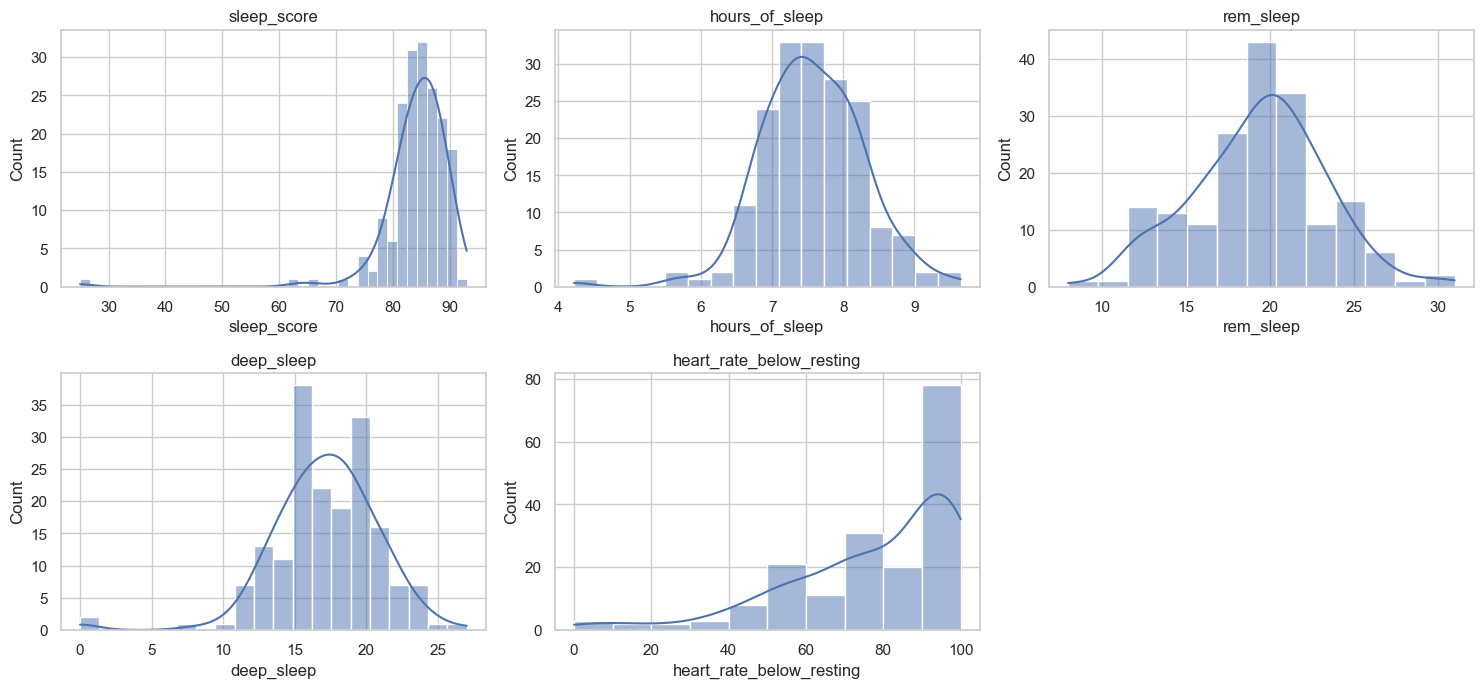

In [25]:
# plot the distribution of all features
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(exclude=["object"]).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

## Part 01: REM Sleep | CI for numerical values

In [30]:
# calculate the mean for the 'rem_sleep' column
rem_sleep_mean = df['rem_sleep'].mean()
print(f"Mean REM Sleep: {rem_sleep_mean:.2f}")

# calculate the standard deviation for the 'rem_sleep' column
rem_sleep_std = df['rem_sleep'].std()
print(f"Standard Deviation of REM Sleep: {rem_sleep_std:.2f}")

# calculate the sample size for the 'rem_sleep' column
rem_sleep_count = df['rem_sleep'].count()
print(f"Sample Size for REM Sleep: {rem_sleep_count}")


Mean REM Sleep: 19.39
Standard Deviation of REM Sleep: 3.92
Sample Size for REM Sleep: 179


In [31]:
# verify the z-score for a 95% confidence interval
from scipy import stats
z_score = stats.norm.ppf(0.975)  # two-tailed test for 95% CI
print(f"Z-score for 95% confidence interval: {z_score:.2f}")

Z-score for 95% confidence interval: 1.96


In [32]:
# calculate the margin of error
margin_of_error = z_score * (rem_sleep_std / np.sqrt(rem_sleep_count))
print(f"Margin of Error: {margin_of_error:.2f}")

Margin of Error: 0.57


In [33]:
#  calculate the upper and lower bounds of the confidence interval
confidence_interval_lower = rem_sleep_mean - margin_of_error
confidence_interval_upper = rem_sleep_mean + margin_of_error
print(f"95% Confidence Interval for REM Sleep: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f})")

95% Confidence Interval for REM Sleep: (18.82, 19.96)


In [34]:
# verify the z-score for a 90% confidence interval
z_score_90 = stats.norm.ppf(0.95)  # two-tailed test for 90% CI

# remember here we have alpha = 0.1, so we use 0.95 for the upper tail (1 - alpha/2)
print(f"Z-score for 90% confidence interval: {z_score_90:.2f}")

Z-score for 90% confidence interval: 1.64


In [ ]:
# calculate the margin of error for the 90% confidence interval
margin_of_error_90 = z_score_90 * (rem_sleep_std / np.sqrt(rem_sleep_count))
print(f"Margin of Error for 90% Confidence Interval: {margin_of_error_90:.2f}")



Margin of Error for 90% Confidence Interval: 0.48


In [39]:
# calculate the upper and lower bounds of the 90% confidence interval
confidence_interval_lower_90 = rem_sleep_mean - margin_of_error_90
confidence_interval_upper_90 = rem_sleep_mean + margin_of_error_90
print(f"90% Confidence Interval for REM Sleep: ({confidence_interval_lower_90:.2f}, {confidence_interval_upper_90:.2f})")

print("We are 90% confident that the true mean lies between 18.91 and 19.87.")

90% Confidence Interval for REM Sleep: (18.91, 19.87)
We are 90% confident that the true mean lies between 18.91 and 19.87.


**Reflect:**
    
- **a. Which is the narrower interval? Why?**
    - The 90% confidence interval is narrower because your confidence interval has lower certainty. Hence, the range of values that need to be included is smaller, leading to a narrower interval.
- **b. What can you say about the center of the intervals?**
    - The center of the intervals is the same in both cases because, independently to your level of confidence, you are moving one margin of error to the left and to the right from the mean. 

- **c. Can you be confident that your friend is having issues with their REM sleep? (Is it below 20%?)**
    - It certainly seems that way, but in order to verify this hypothesis you will need to use a statistical testing technique that you will learn in the next module!

## Part 02: Hours of Sleep | CI for proportions

It is known that you need at least 7 hours of sleep per night for a healthy lifestyle. Let's find a confidence interval for the proportion of nights your friend actually sleeps more than 7 hours.

In [40]:
# calculate the sample size of the dataset
sample_size = df.shape[0]
print(f"Sample Size: {sample_size}")

Sample Size: 179


In [41]:
# calculate the number of nights your friend slept more than 7 hours
nights_more_than_7_hours = df[df['hours_of_sleep'] > 7].shape[0]
print(f"Nights with more than 7 hours of sleep: {nights_more_than_7_hours}")

Nights with more than 7 hours of sleep: 140


In [42]:
# calculate the proportion of nights your friend slept more than 7 hours
proportion_more_than_7_hours = nights_more_than_7_hours / sample_size
print(f"Proportion of nights with more than 7 hours of sleep: {proportion_more_than_7_hours:.2f}")

Proportion of nights with more than 7 hours of sleep: 0.78


In [ ]:
# verify the z-score for a 95% confidence interval
z_score = stats.norm.ppf(0.975)  # two-tailed test for 95% CI
print(f"Z-score for 95% confidence interval: {z_score:.2f}")

Z-score for 95% confidence interval: 1.96


In [49]:
margin_of_error = z_score * np.sqrt((proportion_more_than_7_hours * (1 - proportion_more_than_7_hours)) / sample_size)
print(f"Margin of Error: {margin_of_error:.2f}")

Margin of Error: 0.06


In [50]:
# calculate the lower and upper bounds of the confidence interval
confidence_interval_lower = proportion_more_than_7_hours - margin_of_error
confidence_interval_upper = proportion_more_than_7_hours + margin_of_error
print(f"95% Confidence Interval for Proportion of Nights with More than 7 Hours of Sleep: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f})") 

95% Confidence Interval for Proportion of Nights with More than 7 Hours of Sleep: (0.72, 0.84)


In [51]:
# z-score for 99% confidence interval
z_score_99 = stats.norm.ppf(0.995)  # two-tailed test for 99% CI
print(f"Z-score for 99% confidence interval: {z_score_99:.2f}")

Z-score for 99% confidence interval: 2.58


In [52]:
# margin of error for 99% confidence interval
margin_of_error_99 = z_score_99 * np.sqrt((proportion_more_than_7_hours * (1 - proportion_more_than_7_hours)) / sample_size)
print(f"Margin of Error for 99% Confidence Interval: {margin_of_error_99:.2f}")

# calculate the lower and upper bounds of the 99% confidence interval
confidence_interval_lower_99 = proportion_more_than_7_hours - margin_of_error_99
confidence_interval_upper_99 = proportion_more_than_7_hours + margin_of_error_99
print(f"99% Confidence Interval for Proportion of Nights with More than 7 Hours of Sleep: ({confidence_interval_lower_99:.2f}, {confidence_interval_upper_99:.2f})")    



Margin of Error for 99% Confidence Interval: 0.08
99% Confidence Interval for Proportion of Nights with More than 7 Hours of Sleep: (0.70, 0.86)


## Part 03: REM Sleep | Hypothesis testing

Recall that REM sleep is crucial for cognitive functions like memory consolidation, emotional regulation, and learning, and stress might reduce REM sleep. Normally, REM sleep should account for 20-25% of a person's sleep time, however, if a person is undergoing significant stress, this may be reduced to 15-20%. From the confidence interval you calculated in an earlier practice lab, it seems that your friend isn't doing too great on the REM sleep front. Let's try to confirm this hypothesis with a statistical test.

In [68]:
# set the hypothesized mean for REM sleep
# h0 U=20
# h1 U<20
hypothesized_mean = 20  # 20% of total sleep time
print(f"Hypothesized Mean for REM Sleep: {hypothesized_mean:.2f}")

# this is a left-tailed test, so we will use the z-score for a one-tailed test

rem_sleep_mean = df['rem_sleep'].mean() 
rem_sleep_std = df['rem_sleep'].std()
rem_sleep_count = df['rem_sleep'].count()

print(f"Mean REM Sleep: {rem_sleep_mean:.2f}")
print(f"Standard Deviation of REM Sleep: {rem_sleep_std:.2f}")
print(f"Sample Size for REM Sleep: {rem_sleep_count}")

# t-statistic for rem sleep
t_statistic = (rem_sleep_mean - hypothesized_mean) / (rem_sleep_std / np.sqrt(rem_sleep_count))
print(f"T-statistic for REM Sleep: {t_statistic:.2f}")

# p-value for normal distribution (using the cumulative distribution function)
p_norm = stats.norm.cdf(t_statistic)  # left-tailed test
print(f"P-value for REM Sleep: {p_norm:.4f}")

#p-value from t-distribution (exact the unknown sigma)
p_t = stats.t.cdf(t_statistic, df=rem_sleep_count-1)  # left-tailed test
print(f"P-value for REM Sleep (t-distribution): {p_t:.4f}")


Hypothesized Mean for REM Sleep: 20.00
Mean REM Sleep: 19.39
Standard Deviation of REM Sleep: 3.92
Sample Size for REM Sleep: 179
T-statistic for REM Sleep: -2.08
P-value for REM Sleep: 0.0187
P-value for REM Sleep (t-distribution): 0.0194


Answer the following questions:
- **a. Can you reject the null hypothesis with a 5% significance level?**
     Yes, you can as the p-value is smaller than 0.05
- **b. What about with a 1% significance level?**
    No, you you don't have enough evidence against the null hypothesis becauses the p-value is bigger than the 0.01 significance level
- **c. Do any of these conclusions change if you look at the p-value obtained from the normal or t distributions?**
    No, they don't change. There is very little difference between the two p-values.
- **d. Which confidence level would have a higher false negative rate, 1% or 5%?**
    The 1% confidence level is associated with a higher false negative rate, because it is a more rigorous test. You're more likely to miss a true effect due to your high threshold for evidence.

## Part 04: Hours of sleep | Hypothesis testing

It is known that you need at least 7 hours of sleep per night for a healthy lifestyle. Following the analysis you performed earlier in the course, let's confirm your findings with some hypothesis testing! In this exercise you will be testing the proportion of nights your friend is actually getting enough sleep.

In [70]:
# set the hypothesized mean for hours of sleep
# test if friend sleeps more than 7 hours at least 75% of the time
# h0 U=0.75
# h1 U>0.75
hypothesized_mean_hours = 0.75

# calculate the number of nights your friend slept more than 7 hours
nights_more_than_7_hours = df[df['hours_of_sleep'] > 7].shape[0]
print(f"Nights with more than 7 hours of sleep: {nights_more_than_7_hours}")
# calculate the proportion of nights your friend slept more than 7 hours
proportion_more_than_7_hours = nights_more_than_7_hours / sample_size
print(f"Proportion of nights with more than 7 hours of sleep: {proportion_more_than_7_hours:.2f}")

Nights with more than 7 hours of sleep: 140
Proportion of nights with more than 7 hours of sleep: 0.78


In [72]:
# calculate the  t-statistic for the proportion of nights with more than 7 hours of sleep
t_statistic_hours = (proportion_more_than_7_hours - hypothesized_mean_hours) / np.sqrt((proportion_more_than_7_hours * (1 - proportion_more_than_7_hours)) / sample_size)
print(f"T-statistic for Proportion of Nights with More than 7 Hours of Sleep: {t_statistic_hours:.2f}")

# p-value for normal distribution (using the cumulative distribution function)
p_norm_hours = 1 - stats.norm.cdf(t_statistic_hours)  # right-tailed test
print(f"P-value for Proportion of Nights with More than 7 Hours of Sleep: {p_norm_hours:.4f}")

# p-value from t-distribution (exact the unknown sigma)
p_t_hours = 1 - stats.t.cdf(t_statistic_hours, df=sample_size-1)  # right-tailed test
print(f"P-value for Proportion of Nights with More than 7 Hours of Sleep (t-distribution): {p_t_hours:.4f}")


T-statistic for Proportion of Nights with More than 7 Hours of Sleep: 1.04
P-value for Proportion of Nights with More than 7 Hours of Sleep: 0.1489
P-value for Proportion of Nights with More than 7 Hours of Sleep (t-distribution): 0.1496


**Can you reject the null hypothesis with a 5% significance level? What about 10%?**

Since the p-value is pretty high you can not reject the null hypothesis neither with 5% nor 10% significance level